First 5 rows of the data:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40

/tmp/ipython-input-1824092999.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood group'].replace('brookln', 'Brooklyn', inplace=True)
/tmp/ipython-input-1824092999.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

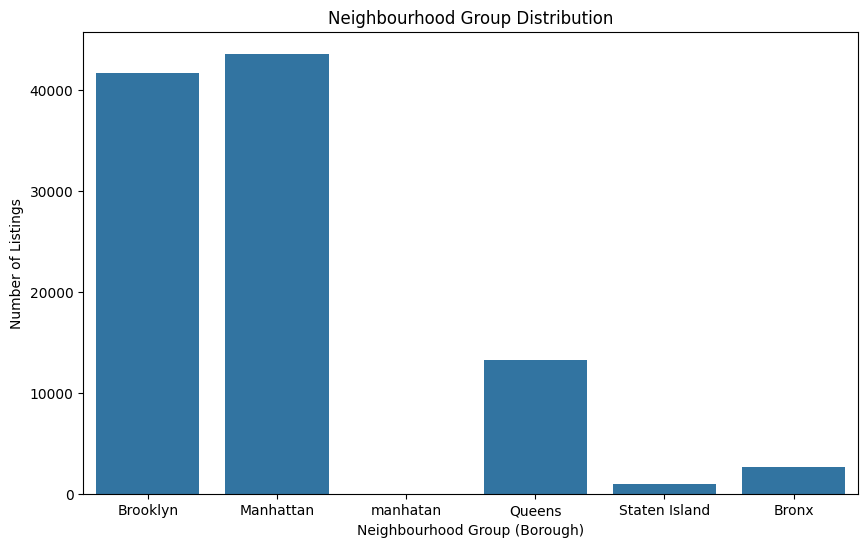

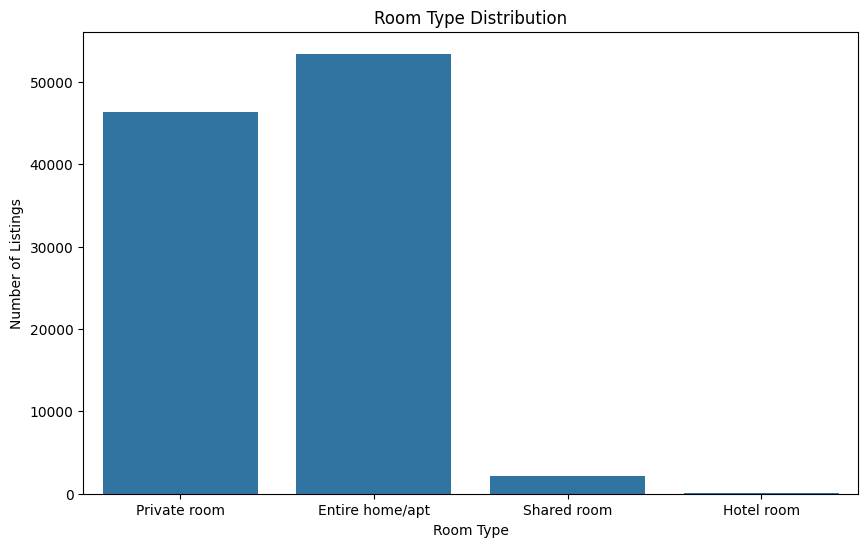

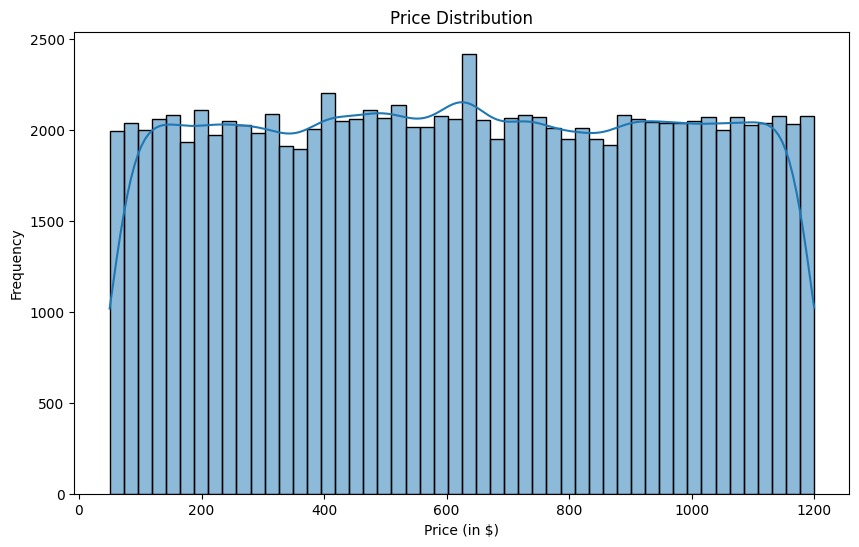

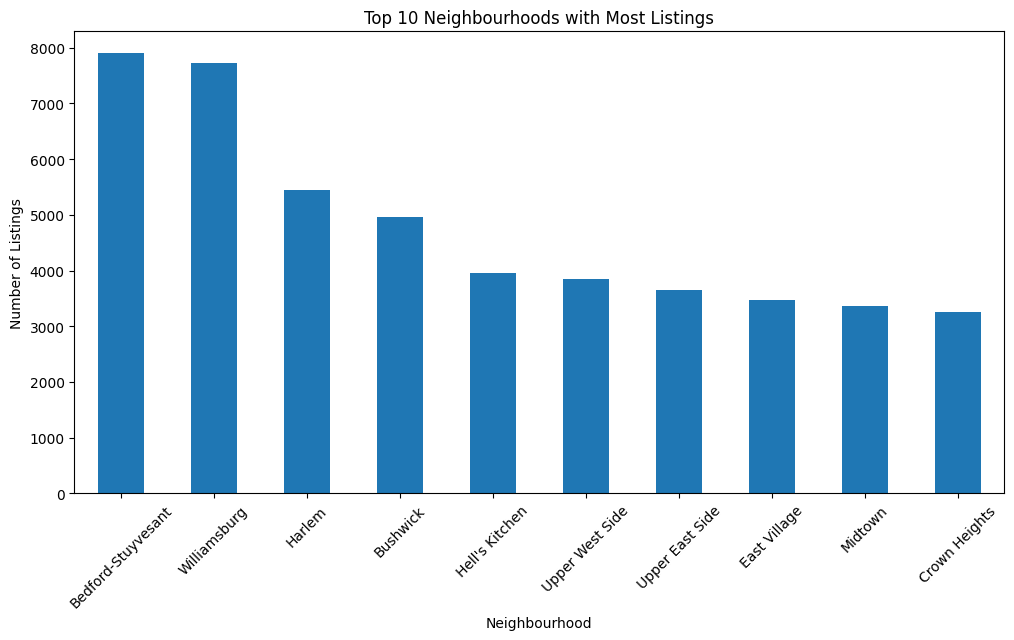

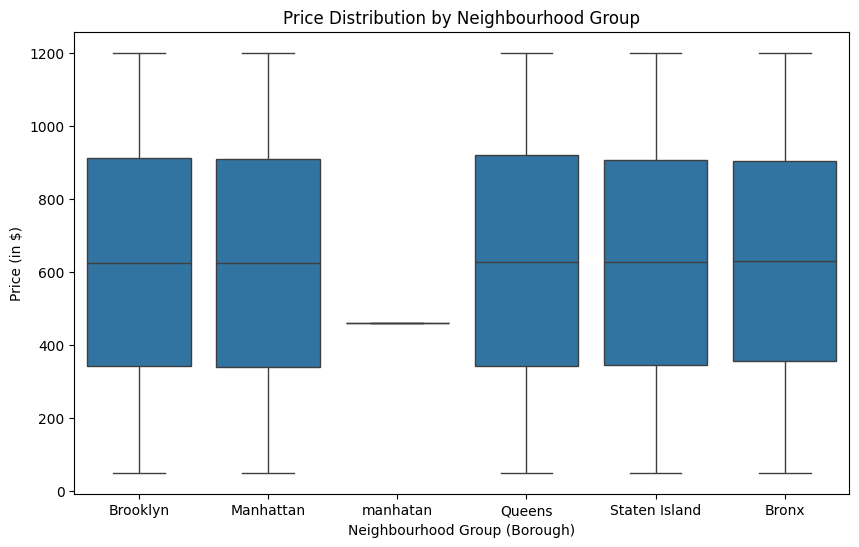


Generating interactive map...


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
# Make sure "Airbnb_Open_Data.xlsx" is in the same folder as your script
df = pd.read_excel("Airbnb_Open_Data.xlsx")

# Display the first 5 rows of the dataframe
print("First 5 rows of the data:")
print(df.head())

# Get information about the dataframe
print("\nDataframe Info:")
df.info()

# Check for duplicated values
print("\nDuplicate Value Counts:")
print(df.duplicated().value_counts())

# Drop the duplicated values
df.drop_duplicates(inplace=True)
print("\nShape of dataframe after dropping duplicates:", df.shape)

# Correcting the 'neighbourhood group' typo
df['neighbourhood group'].replace('brookln', 'Brooklyn', inplace=True)

# Removing unwanted columns (but keeping lat and long for the map)
df.drop(['country', 'country code', 'license'], axis=1, inplace=True)
print("\nColumns dropped. Kept 'lat' and 'long' for the map.")

# Handling missing values
df['reviews per month'].fillna(0, inplace=True)
df['review rate number'].fillna(df['review rate number'].mean(), inplace=True)
df['minimum nights'].fillna(df['minimum nights'].mean(), inplace=True)
df['number of reviews'].fillna(df['number of reviews'].mean(), inplace=True)
df['host_identity_verified'].fillna('unconfirmed', inplace=True)
df['Construction year'].fillna(df['Construction year'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['service fee'].fillna(df['service fee'].mean(), inplace=True)
df['NAME'].fillna('No Name', inplace=True)
df['host name'].fillna('No Host Name', inplace=True)
df['cancellation_policy'].fillna('strict', inplace=True)
df['house_rules'].fillna('No house rules', inplace=True)
print("\nMissing values handled.")


# --- Visualizations ---

# 1. Neighbourhood Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood group', data=df)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group (Borough)')
plt.ylabel('Number of Listings')
plt.show()

# 2. Room Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

# 3. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (in $)')
plt.ylabel('Frequency')
plt.show()

# 4. Top 10 Neighbourhoods
plt.figure(figsize=(12, 6))
df['neighbourhood'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Neighbourhoods with Most Listings')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# 5. Price by Neighbourhood Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group (Borough)')
plt.ylabel('Price (in $)')
plt.show()

# 6. Interactive Map of Listings
print("\nGenerating interactive map...")
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="neighbourhood group",
                        size="price", hover_name="NAME",
                        mapbox_style="carto-positron", zoom=10,
                        title="Interactive Map of NYC Airbnb Listings")
fig.show()